# CySD Internship
 
 start date 17 juillet 2021
 
## Goal
Implement efficient critical infrastructure protection strategies with Ai based models.

## To Do

-Gather info and learn more about CI and existing strategies for protecting critical infrasctructure.

<s>-Set the environement for datascience developement.</s>

<s>-explore HARC-EU data of CI for risk assessement.</s>

-Learn about Dependability concept and time and outage.

-prepare the data (clip the renewable energy data to work on as a use case).

-classify plants by density.

-Come up with context aware policies.

In [2]:
#conda info

In [3]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib
import cv2


In [4]:
from osgeo import ogr, gdal
from osgeo import gdalconst

In [5]:
#Playing around with data and exploring.
fp2=r'C:\Users\LENOVO\HARCI EU\ci_ene06.tif'

In [6]:
raster2 = rasterio.open(fp2)
raster2.colorinterp[0]
type(raster2)
print(raster2.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 3893, 'height': 4030, 'count': 1, 'crs': CRS.from_epsg(3035), 'transform': Affine(1000.0, 0.0, 2635000.0,
       0.0, -1000.0, 5416000.0)}


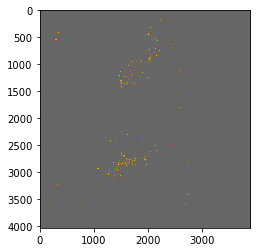

In [7]:
plt.imshow(raster2.read(1),cmap="Dark2_r",vmin=0,vmax=1)
#plt.savefig('Tiff.png',dpi=200)
plt.show()

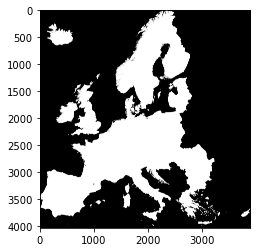

'PROJCS["ETRS_1989_LAEA",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3035"]]'

In [8]:
dataset= gdal.Open(fp2)
img = dataset.GetRasterBand(1).ReadAsArray()
f = plt.figure()

plt.imshow(img,cmap="Greys_r")
#plt.savefig('Tiff.png',dpi=200)

plt.show()

dataset.GetProjection()

# RENEWABLE ENERGY

In [9]:
fp1 =r'.\ren_ene_map.tif'

In [10]:
raster = rasterio.open(fp1)
raster.colorinterp[0]
type(raster)
print(raster.meta)

#count : 4 -> 4 bands where the first one is the locations of the plants and the 4th band is the outline of the map
#Our analysis and alogorithms are lead on the first band. 

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 267, 'height': 276, 'count': 4, 'crs': CRS.from_epsg(3035), 'transform': Affine(1000.0, 0.0, 3580000.0,
       0.0, -1000.0, 3060000.0)}


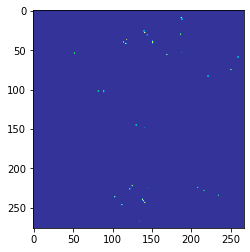

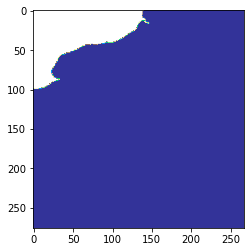

In [11]:
show(raster.read(1),cmap='terrain')

plt.imshow(raster.read(4),cmap="terrain_r")
#plt.savefig('Tiff.png',dpi=200)
plt.show()

# Classification

In [12]:
#Seperating locations(white pixels) from the map.
loc_band = np.asarray(raster.read(1))
map_band=arr = np.asarray(raster.read(4))


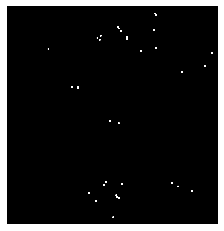

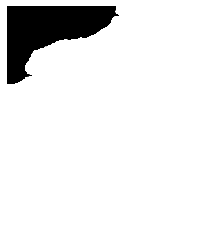

In [13]:
plt.imshow(loc_band, cmap='gray', vmin=0, vmax=1)
plt.axis("off")
plt.savefig('loc_band.png', bbox_inches='tight', pad_inches=0,dpi=200)
plt.show()
plt.imshow(map_band, cmap='gray', vmin=0, vmax=1)
plt.axis("off")
plt.savefig('map_band.png', bbox_inches='tight')
plt.show()

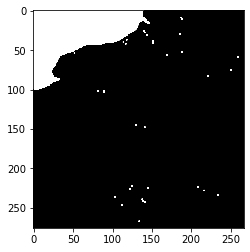

In [14]:
#merging the bands into one image, ie: map with the locations of renewable energy CIs.
merged=loc_band + cv2.bitwise_not(map_band)
plt.imshow(merged, cmap='gray', vmin=0, vmax=1)
plt.show()

# Identifying the plants


Number of energy plants: 29


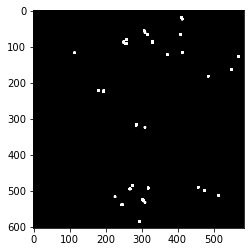

In [15]:

gray = cv2.imread("loc_band.png",0)
  
# threshold
th, threshed = cv2.threshold(gray, 1, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
  
# findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, 
                    cv2.CHAIN_APPROX_SIMPLE)[-2]
  
# filter by area
s1 = 0
s2 = 25
xcnts = []
  
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)
  
# printing output
print("\nNumber of energy plants: {}".format(len(xcnts)))
plt.imshow(gray,cmap="gray", vmin=0, vmax=1)
plt.show()





In [16]:
pixels = np.argwhere(gray == 255)
pixels.size


1096

# Density Dimension

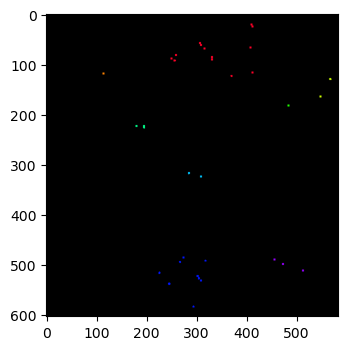

In [17]:
#DBSCAN Clustering
from plantcv import plantcv as pcv


pcv.params.debug = "plot"

clust_img, clust_masks = pcv.spatial_clustering(gray, algorithm="DBSCAN", min_cluster_size=3, max_distance=0.5)


In [18]:
#Resizing
rgbmap_band = cv2.cvtColor(map_band,cv2.COLOR_GRAY2RGB)
rgbmap_band = cv2.resize(rgbmap_band, (584,604))
rgbmap_band.shape

(604, 584, 3)

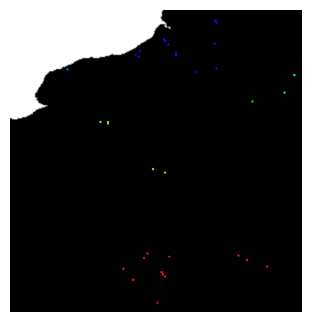

In [19]:
#Cluster output
cluster_map=clust_img+cv2.bitwise_not(rgbmap_band)
plt.imshow(cluster_map, vmin=0, vmax=1)
plt.axis("off")
plt.savefig("Cluster_Map.png",dpi=200)
plt.show()




# ALL ENERGY PLANTS

In [20]:
raster2 = rasterio.open(r'C:\Users\LENOVO\all_ene.tif')
raster2.colorinterp[0]
type(raster2)
print(raster2.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 267, 'height': 276, 'count': 1, 'crs': CRS.from_epsg(3035), 'transform': Affine(1000.0, 0.0, 3580000.0,
       0.0, -1000.0, 3060000.0)}


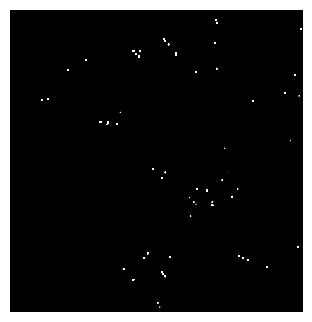

In [21]:
plt.imshow(raster2.read(1),cmap="gray",vmin=0,vmax=1)
plt.axis("off")
plt.savefig('loc_band2.png', bbox_inches='tight', pad_inches=0,dpi=200)
plt.show()
#Seperating locations(white pixels) from the map.
loc_band2 = np.asarray(raster2.read(1))


Number of renewable and non renewable energy plants: 54


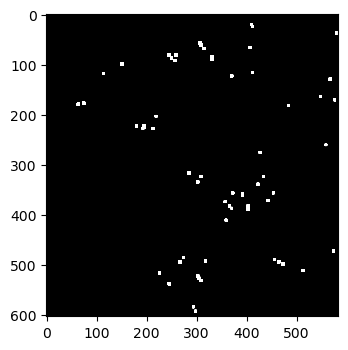

In [22]:
#Identifying plants
gray2 = cv2.imread("loc_band2.png",0)
  
# threshold(binary image->every pixel that is not black is a plant)
th, threshed = cv2.threshold(gray2, 1, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
  
# findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, 
                    cv2.CHAIN_APPROX_SIMPLE)[-2]
  
# filter by area
s1 = 0
s2 = 25
xcnts = []
  
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)
  
# printing output
print("\nNumber of renewable and non renewable energy plants: {}".format(len(xcnts)))
plt.imshow(gray2,cmap="gray", vmin=0, vmax=1)
plt.show()




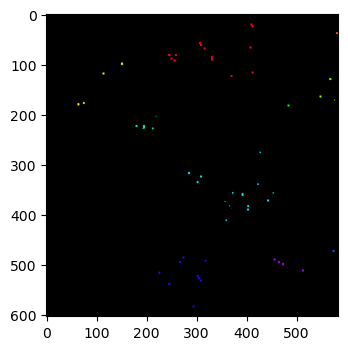

In [23]:
#DBSCAN Clustering
from plantcv import plantcv as pcv


pcv.params.debug = "plot"

clust_map, clust_masks = pcv.spatial_clustering(gray2, algorithm="DBSCAN", min_cluster_size=3, max_distance=0.5)


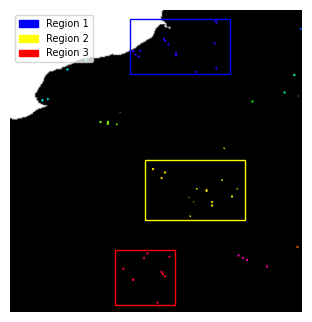

In [34]:
#Cluster output
cluster_map=clust_map+cv2.bitwise_not(rgbmap_band)
plt.imshow(cluster_map,cmap="CMRmap" ,vmin=0, vmax=1)
region1 = plt.Rectangle((240,18), 200, 110,fc="None",ec="blue")
plt.gca().add_patch(region1)

region2 = plt.Rectangle((270,300), 200, 120,fc="None",ec="yellow")
plt.gca().add_patch(region2)

region3 = plt.Rectangle((210,480), 120, 110,fc="None",ec="red")
plt.gca().add_patch(region3)

red_box = matplotlib.patches.Patch(color='red', label='Region 3')
yellow_box = matplotlib.patches.Patch(color='yellow', label='Region 2')
blue_box = matplotlib.patches.Patch(color='blue', label='Region 1')
plt.legend(handles=[blue_box,yellow_box,red_box],fontsize=7)

plt.axis("off")
plt.savefig("Clustered_plants.png",dpi=200)
plt.show()


# Economic Dimension

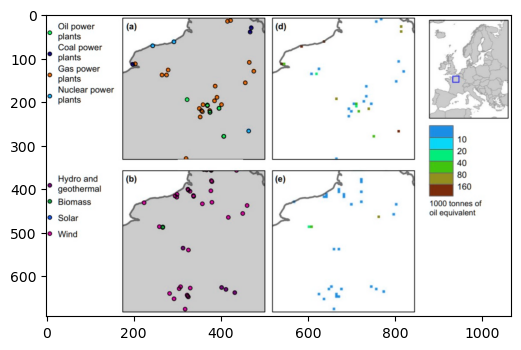

In [25]:
plt.imshow(cv2.imread("eco_map.jpg"))
plt.show()

# CONTEXT AWARE POLICY

Following Finland's power outage policy **this table** below represents a new policy that takes into consideration 2 dimensions of Critical Infrastructure features around Paris, France region, therefore the policy is context aware.

We can notice that the second region holds the most economic value and density of CIs. For that reason customers in region 2 benefit from higher compensation rates.

Compensation policy in each region is different based on the economic and density dimension.

Outside these regions bounds the consumer is met with the standard compensation plan.

| Outage time (h) | Compensation inside region1 (%) | Compensation inside region2 (%) | Compensation inside region3 (%) | Compensation outisde region bounds (%) |
|:---------------:|:-------------------------------:|:-------------------------------:|:-------------------------------:|:--------------------------------------:|
|      12-24      |                14               |                15               |                12               |                   10                   |
|      24-72      |                27               |                30               |                26               |                   25                   |
|      72-120     |                53               |                56               |                52               |                   50                   |
|     120-192     |               105               |               110               |               104               |                   100                  |
|     192-288     |               160               |               170               |               155               |                   150                  |
|       >288      |               200               |               200               |               200               |                   200                  |